In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = [[828, 920, 1234567, 1020, 1111],
            [824, 910, 2345612, 1090, 1234],
            [880, 900, 3456123, 1010, 1000],
            [870, 990, 2312123, 1001, 1122],
            [860, 980, 3223123, 1008, 1133],
            [850, 970, 2432123, 1100, 1221]]
data = np.float32(data)

In [3]:
x_data = data[:,:-1]
y_data = data[:,[-1]]

In [5]:
x_data.shape

(6, 4)

In [5]:
scaler = MinMaxScaler()
x_data_scaled = scaler.fit_transform(x_data)
x_data_scaled

array([[0.0714283 , 0.22222233, 0.        , 0.19191933],
       [0.        , 0.11111164, 0.50012016, 0.89899063],
       [1.        , 0.        , 1.        , 0.09090996],
       [0.8214283 , 1.        , 0.48504567, 0.        ],
       [0.6428566 , 0.8888893 , 0.8951186 , 0.07070732],
       [0.4642849 , 0.7777777 , 0.5390618 , 1.        ]], dtype=float32)

In [6]:
y_data_scaled = scaler.fit_transform(y_data)
y_data_scaled

array([[0.47435904],
       [1.0000005 ],
       [0.        ],
       [0.52136755],
       [0.56837654],
       [0.94444466]], dtype=float32)

In [10]:
# 정규화 X
dense = Dense(units = 1, input_dim = 4) # w : 4 * 1
model = Sequential([dense])
model.compile(loss = 'mse', optimizer = Adam(0.1))
h = model.fit(x_data, y_data, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 333ms/step - loss: 1187488128.0000
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 51079131136.0000
Epoch 3/500
1/1 [==============================] - 0s 841us/step - loss: 3683420928.0000
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 11136848896.0000
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 28268619776.0000
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 18242867200.0000
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 2959238400.0000
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 1310316416.0000
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 10398225408.0000
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 14786382848.0000
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 9508122624.0000
Epoch 12/500
1/1 [===========

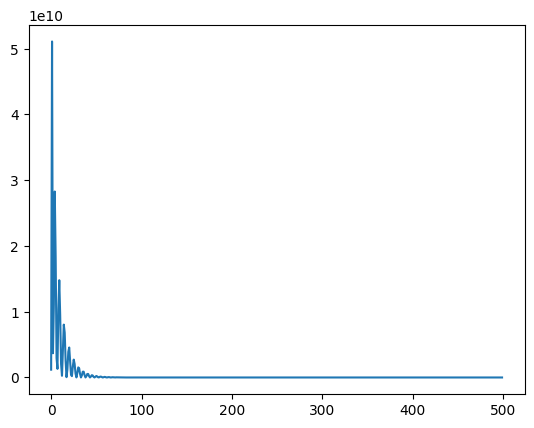

In [12]:
plt.plot(h.history['loss'])
plt.show()

In [13]:
# 정규화
dense = Dense(units = 1, input_dim = 4) # w : 4 * 1
model = Sequential([dense])
model.compile(loss = 'mse', optimizer = Adam(0.1))
h = model.fit(x_data_scaled, y_data_scaled, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 393ms/step - loss: 0.0431
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0858
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0307
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0384
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0218
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0288
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0303
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0233
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 13/500
1/1 [==============================] - 0s 0

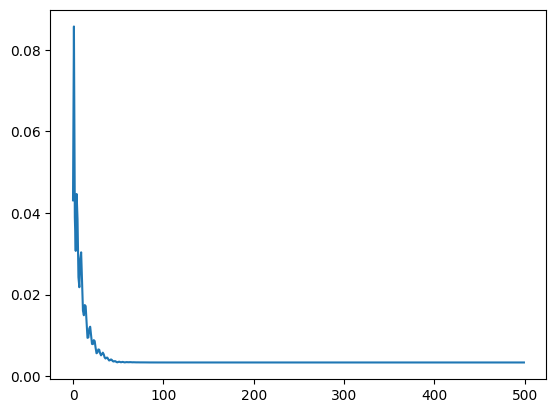

In [14]:
plt.plot(h.history['loss'])
plt.show()

In [20]:
# 아래 데이터를 정규화하고

In [21]:
boston = pd.read_csv('data/boston.csv', index_col = 'Unnamed: 0')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,[-1]]
scaler = StandardScaler()
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [40]:
# 정규화
dense = Dense(units = 1, input_dim = 13) # w : 4 * 1
model = Sequential([dense])
model.compile(loss = 'mse', optimizer = Adam(0.01))
h = model.fit(X_scaled, y, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 600.3275
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 559.7247
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 521.7072
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 486.2399
Epoch 5/1000
16/16 [==============================] - 0s 987us/step - loss: 453.2055
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 423.2141
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 394.9172
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 368.9474
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 345.4344
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 323.5747
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 303.6091
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 285.4766

In [43]:
y.iloc[0]

medv    24.0
Name: 1, dtype: float64

In [44]:
model.predict(X_scaled)[0]

16/16 [==============================] - 0s 997us/step


array([29.69482], dtype=float32)

In [46]:
from sklearn.metrics import r2_score

r2_score(y,model.predict(X_scaled))

16/16 [==============================] - 0s 1ms/step


0.7357136958659551